# Final project


In [1]:
# lets start by getting the data
import csv
import math
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter

# Dataset url:
# https://data.sfgov.org/Public-Safety/Fire-Department-Calls-for-Service/nuek-vuh3

data = []

def process(CallNumber,CallType,CallDate,WatchDate, IncidentNumber,
                ReceivedDtTm,EntryDtTm,DispatchDtTm,ResponseDtTm,
                OnSceneDtTm, TransportDtTm, HospitalDtTm,CallFinalDisposition, 
                AvailableDtTm, Address, City, FinalPriority, 
                CallTypeGroup,UnitType, UnitSequenceInCallDispath, FirePreventionDistrict, 
                SupervisorDistrict,NeighborhoodDistrict, Location):
    data.append({
            "CallNumber":CallNumber,
            "CallType":CallType,
            "CallDate":CallDate,
            "WatchDate":WatchDate,
            "IncidentNumber":IncidentNumber,
            
            "ReceivedDtTm":ReceivedDtTm,
            "EntryDtTm":EntryDtTm,
            "DispatchDtTm":DispatchDtTm,
            "ResponseDtTm":ResponseDtTm,
            
            "OnSceneDtTm":OnSceneDtTm,
            "TransportDtTm":TransportDtTm,
            "HospitalDtTm":HospitalDtTm,
            "CallFinalDisposition":CallFinalDisposition,
            
            "AvailableDtTm":AvailableDtTm,
            "Address":Address,
            "City":City,
            "FinalPriority":FinalPriority,
            
            "CallTypeGroup":CallTypeGroup, 
            "UnitType":UnitType,
            "UnitSequenceInCallDispath":UnitSequenceInCallDispath,
            "FirePreventionDistrict":FirePreventionDistrict,
            
            "SupervisorDistrict":SupervisorDistrict,
            "NeighborhoodDistrict":NeighborhoodDistrict,
            "Location":Location
        })

# Fire_Department_Calls_for_Service_2012-2017.csv
# Fire_Department_Calls_for_Service_All.csv
    
with open("csv_files/Fire_Department_Calls_for_Service _2012-2017.csv", "rb") as csvfile:
    reader = csv.DictReader(csvfile,delimiter=",")
    for row in reader:
        CallNumber = row["Call Number"] 
        #UnitID = row["Unit ID"]
        IncidentNumber = row["Incident Number"]
        CallType = row["Call Type"]
        CallDate = row["Call Date"]
        WatchDate = row["Watch Date"]
        ReceivedDtTm = row["Received DtTm"] # Date and time of call is received at the 911 Dispatch Center.
        EntryDtTm = row["Entry DtTm"] # Date and time the 911 operator submits the entry of the initical call information into the CAD system
        DispatchDtTm = row["Dispatch DtTm"] # Date and time the 911 operator dispatches this unit to the call.
        ResponseDtTm = row["Response DtTm"] # Date and time this unit acknowledges the dispatch and records that the unit is en route to the location of the call.
        OnSceneDtTm = row["On Scene DtTm"] # Date and time the unit records arriving to the location of the incident
        TransportDtTm = row["Transport DtTm"] # If this unit is an ambulance, date and time the unit begins the transport unit arrives to hospital
        HospitalDtTm = row["Hospital DtTm"] # If this unit is an ambulance, date and time the unit arrives to the hospital.
        CallFinalDisposition = row["Call Final Disposition"]
        AvailableDtTm = row["Available DtTm"]
        Address = row["Address"]
        City = row["City"] 
        #ZipcodeOfIncident = row["Zipcode of Incident"]
        #Battalion = row["Battalion"]
        #Station Area = row["Station Area"]
        #Box = row["Box"]
        #OriginalPriority = row["Original Priority"]
        #Priority = row["Priority"]
        FinalPriority = row["Final Priority"]
        CallTypeGroup = row["Call Type Group"] #Call types are divided into four main groups: Fire, Alarm, Potential Life Threatening and Non Life Threatening.
        #NumberOfAlarms = row["Number of Alarms"] - Always one so this does not tell us anything
        UnitType = row["Unit Type"]
        UnitSequenceInCallDispath = row["Unit sequence in call dispatch"]
        FirePreventionDistrict = row["Fire Prevention District"]
        SupervisorDistrict = row["Supervisor District"]
        NeighborhoodDistrict = row["Neighborhood  District"]
        Location = row["Location"]
        
        process(CallNumber,CallType,CallDate,WatchDate,IncidentNumber,
                ReceivedDtTm,EntryDtTm,DispatchDtTm,ResponseDtTm,
                OnSceneDtTm, TransportDtTm, HospitalDtTm,
                CallFinalDisposition, AvailableDtTm, Address, City,
                FinalPriority, CallTypeGroup, UnitType, UnitSequenceInCallDispath,
                FirePreventionDistrict, SupervisorDistrict, NeighborhoodDistrict, Location)

### Finding all neighborhoods in the data

In [5]:
set([line["NeighborhoodDistrict"] for line in data])

{'Bayview Hunters Point',
 'Bernal Heights',
 'Castro/Upper Market',
 'Chinatown',
 'Excelsior',
 'Financial District/South Beach',
 'Glen Park',
 'Golden Gate Park',
 'Haight Ashbury',
 'Hayes Valley',
 'Inner Richmond',
 'Inner Sunset',
 'Japantown',
 'Lakeshore',
 'Lincoln Park',
 'Lone Mountain/USF',
 'Marina',
 'McLaren Park',
 'Mission',
 'Mission Bay',
 'Nob Hill',
 'Noe Valley',
 'None',
 'North Beach',
 'Oceanview/Merced/Ingleside',
 'Outer Mission',
 'Outer Richmond',
 'Pacific Heights',
 'Portola',
 'Potrero Hill',
 'Presidio',
 'Presidio Heights',
 'Russian Hill',
 'Seacliff',
 'South of Market',
 'Sunset/Parkside',
 'Tenderloin',
 'Treasure Island',
 'Twin Peaks',
 'Visitacion Valley',
 'West of Twin Peaks',
 'Western Addition'}

###  Multiple units can be called out for each call therefore multiple lines can be created for each call. We decided to group the data by call number and extract the relevant data.

In [2]:
import cytoolz.curried as tlz

data_grouped = tlz.groupby(lambda x: x['CallNumber'],data)
for d in data_grouped:
    temp = {
        'CallType': "",
        'CallTypeGroup': "",
        'ReceivedDtTm': "",
        'NeighborhoodDistrict': "",
        'Location': "",
        'FinalPriority': -1,
        'CallFinalDisposition': "",
        'CallDate': ""
    }
    for line in data_grouped[d]:
        temp['CallType'] = line['CallType']
        temp['CallTypeGroup'] = line['CallTypeGroup']
        temp['ReceivedDtTm'] = line['ReceivedDtTm']
        temp['NeighborhoodDistrict'] = line['NeighborhoodDistrict']
        temp['Location'] = line['Location']
        temp['FinalPriority'] = line['FinalPriority']
        temp['CallFinalDisposition'] = line['CallFinalDisposition']
        temp['CallDate'] = line['CallDate']
    data_grouped[d] = temp

# Basic stats

 - Size = 592,5 MB 
 - Number of rows = 1423564
 - Number of calls = 649354
 - Number of variables = 34


### Let´s start our analysis by investigation how many different call types there are:

In [3]:
callTypes = set([line["CallType"] for line in data])

print "Call types categories:"
for calltype in callTypes:
    print calltype


Call types categories:

Mutual Aid / Assist Outside Agency
Elevator / Escalator Rescue
Transfer
Oil Spill
Vehicle Fire
Other
Administrative
Traffic Collision
Train / Rail Fire
HazMat
Fuel Spill
Outside Fire
Structure Fire
High Angle Rescue
Water Rescue
Watercraft in Distress
Industrial Accidents
Train / Rail Incident
Suspicious Package
Extrication / Entrapped (Machinery, Vehicle)
Assist Police
Citizen Assist / Service Call
Smoke Investigation (Outside)
Alarms
Explosion
Aircraft Emergency
Odor (Strange / Unknown)
Marine Fire
Confined Space / Structure Collapse
Electrical Hazard
Medical Incident
Gas Leak (Natural and LP Gases)


### Call type groups

In [4]:
callTypeGroups = set([line["CallTypeGroup"] for line in data])

print "Call type groups:"
for calltypeGroup in callTypeGroups:
    print calltypeGroup



Call type groups:
Fire

Alarm
Potentially Life-Threatening
Non Life-threatening


### Call final disposition 

In [5]:
CallFinalDispositions = set([line["CallFinalDisposition"] for line in data_grouped.values()])
print("Call Final Disposition: ")
for finalDisposition in CallFinalDispositions:
    print finalDisposition

Call Final Disposition: 
Gone on Arrival
Unable to Locate
Code 3 Transport
Patient Declined Transport
Code 2 Transport
SFPD
Fire
Against Medical Advice
No Merit
CHP
Duplicate
Other
Cancelled
Medical Examiner
Multi-casualty Incident


### Now it´s time to further investigate our dataset by creating some beautiful plots. We will start easily by plotting up the total number of calls in each neighborhood.

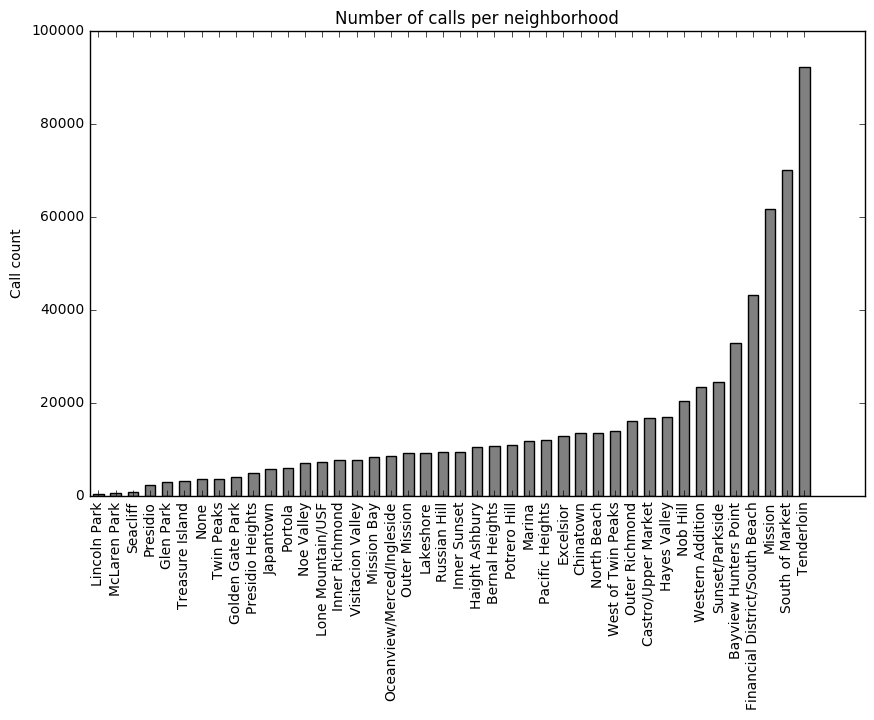

In [27]:
neigborhoodDistrict_count = Counter([line["NeighborhoodDistrict"] for line in data_grouped.values()])
neigborhoodDistrict_count = sorted(neigborhoodDistrict_count.items(), key=lambda i: i[1])

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
x = [key for key,_ in neigborhoodDistrict_count] 
y = [value for _,value in neigborhoodDistrict_count] 

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.xticks(rotation=90)
plt.title("Number of calls per neighborhood")
plt.ylabel("Call count")
plt.show()

### Number of calls per call type groups

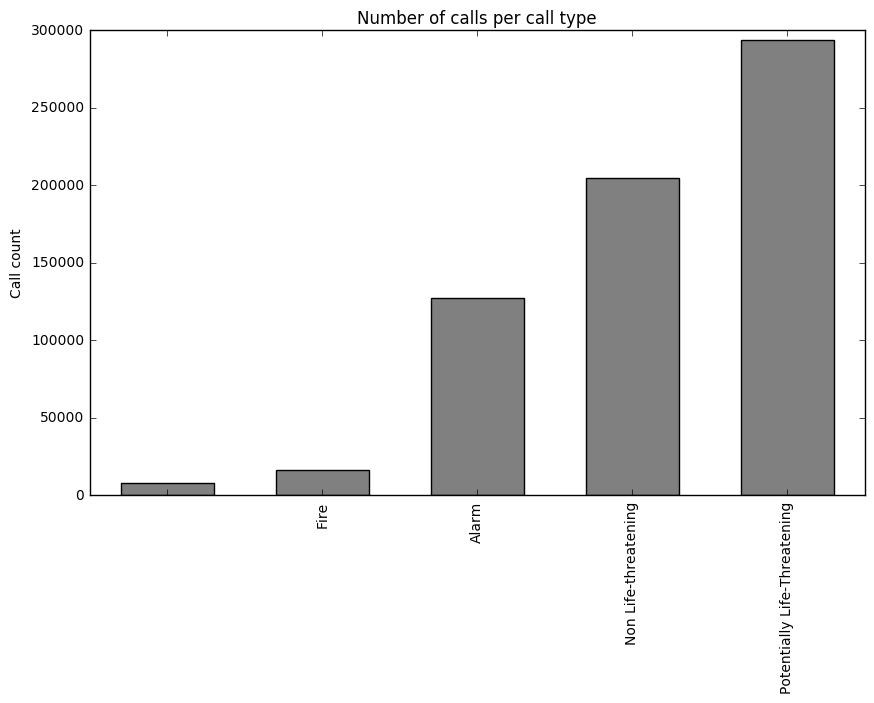

In [3]:
calltypesGroup_count = Counter([line["CallTypeGroup"] for line in data_grouped.values()])
calltypesGroup_count = sorted(calltypesGroup_count.items(), key=lambda i: i[1])

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
x = [key for key,_ in calltypesGroup_count] 
y = [value for _,value in calltypesGroup_count] 

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.xticks(rotation=90)
plt.title("Number of calls per call type")
plt.ylabel("Call count")
plt.show()

### Number of calls per call type

The most commonly occurring call type:  [('Medical Incident', 470363)]
The least commonly occuring call type:  ('Train / Rail Fire', 1)


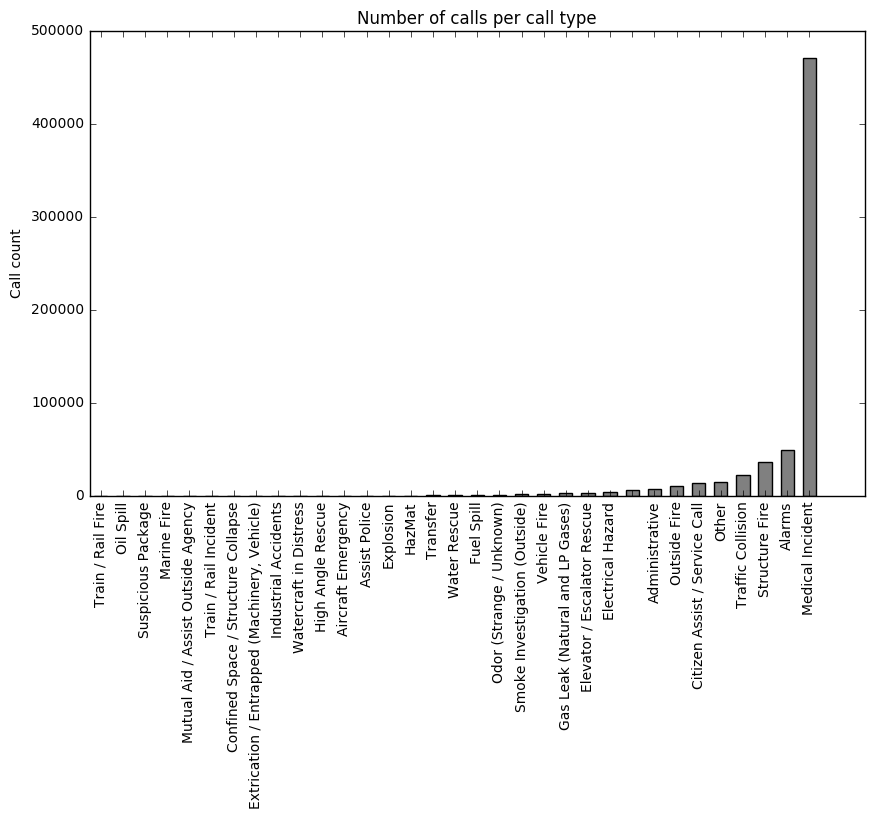

In [6]:
calltypes_count = Counter([line["CallType"] for line in data_grouped.values()])
print "The most commonly occurring call type: ", calltypes_count.most_common(1)
print "The least commonly occuring call type: ", calltypes_count.most_common()[-1]
calltypes_count = sorted(calltypes_count.items(), key=lambda i: i[1])

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
x = [key for key,_ in calltypes_count] 
y = [value for _,value in calltypes_count] 

# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.xticks(rotation=90)
plt.title("Number of calls per call type")
plt.ylabel("Call count")
plt.show()

###  Number of calls for each hour of the day

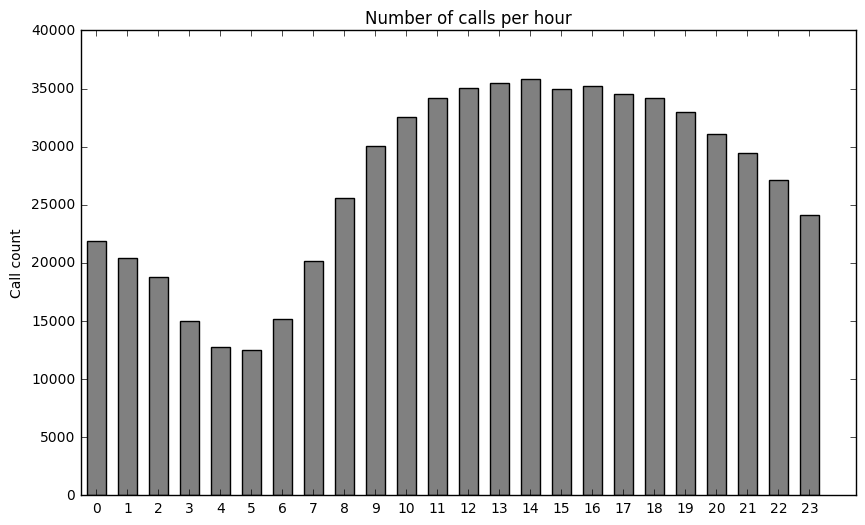

In [7]:
from datetime import datetime

def changeFromAmPm_to_hours(time):
    time = " ".join(time.split(" ")[1:])
    time = datetime.strptime(time, '%I:%M:%S %p')
    return str(time.hour)

numberOfCalls_perHour =  Counter([int(changeFromAmPm_to_hours(line["ReceivedDtTm"])) for line in data_grouped.values()]).items()
x = [key for key,_ in numberOfCalls_perHour] 
y = [value for _,value in numberOfCalls_perHour] 

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.title("Number of calls per hour")
plt.ylabel("Call count")
plt.show()

### Next we check number of crimes for each year from 2012 to 2017

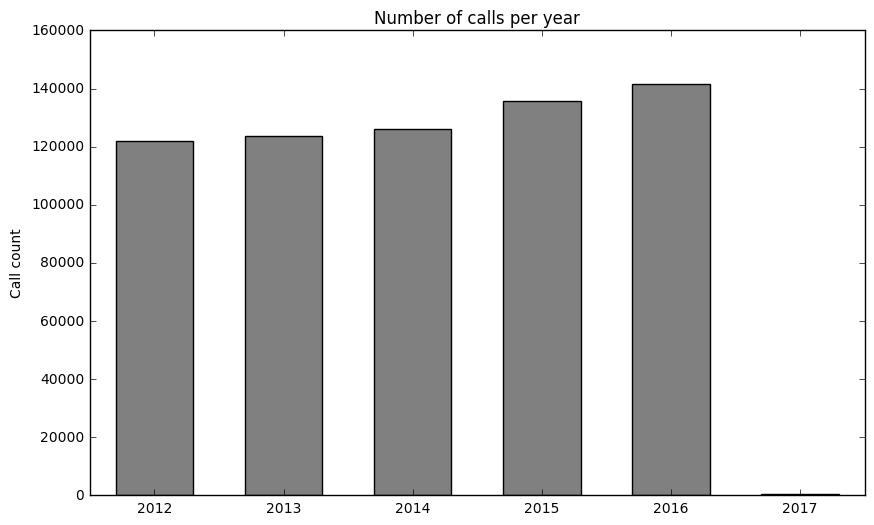

In [8]:
numberOfCalls_perYear = sorted(Counter([line["CallDate"].split("/")[-1] for line in data_grouped.values()]).items())
x = [key for key,_ in numberOfCalls_perYear] 
y = [value for _,value in numberOfCalls_perYear] 

plt.figure(num=None, figsize=(10,6), dpi=80, facecolor="w", edgecolor="k")
# bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
xs = [i+0.2 for i,_ in enumerate(x)]
# plot bar with left x-coordinates [xs], heights [num_occurrence]
plt.bar(xs,y,width=0.6,color="gray")
plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
plt.title("Number of calls per year")
plt.ylabel("Call count")
plt.show()

### Changes in call types frequency between years

Next let´s consider the changes between years of each call type

In [9]:
# The data collection for this subsection

# Get all call types 
callTypes = sorted(set([line["CallType"] for line in data_grouped.values()]))
data_callTypes_groupedByYears = defaultdict(list)

# Group together all rows with the same Call type, only maintaining the data from the Date key
for row in data_grouped.values():
    data_callTypes_groupedByYears[row["CallType"]].append(row["CallDate"].split("/")[-1]) 
        

In [10]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,50), dpi=80, facecolor="w", edgecolor="k")

years = ["2012","2013","2014","2015","2016"]

# Create a bar chart for each categories
for index,callType in enumerate(callTypes):
    callTypes_year = sorted(Counter(data_callTypes_groupedByYears[callType]).items())
    y = defaultdict(int)
    for year in years :
        y[year] = 0
    
    for year,count in callTypes_year:
        if year != "2017":
            y[year] = count
        
    y = [item[1] for item in sorted(y.items())]
    x = years
    
    plt.subplot(len(callTypes)/2+1,2,index+1)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
    xs = [i+0.25 for i,_ in enumerate(x)]
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    plt.bar(xs,y,width=0.5,color="gray")
    plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
    plt.xticks(rotation=90)
    y_max = int(max(y)*1.6)
    plt.ylim(ymax = y_max, ymin = 0)
    if callType == "":
        plt.title("Untitled")
    else:
        plt.title(callType)
    plt.ylabel("Call count")

### Changes in call types groups frequency between years

Next let´s consider the changes between years of each call type group
 - Call types are divided into four main groups: Fire, Alarm, Potential Life Threatening and Non Life Threatening.
 - **NOTE:** From our analysis it is clear that 2012 is the first year where the attribute call types groups was added to the dataset

In [11]:
# The data collection for this subsection
# Get all call types 
CallFinalDispositions = sorted(set([line["CallTypeGroup"] for line in data_grouped.values()]))
data_callTypeGroups_groupedByYears = defaultdict(list)
# Group together all rows with the same Call type, only maintaining the data from the Date key
for row in data_grouped.values():
    data_callTypeGroups_groupedByYears[row["CallTypeGroup"]].append(row["CallDate"].split("/")[-1]) 

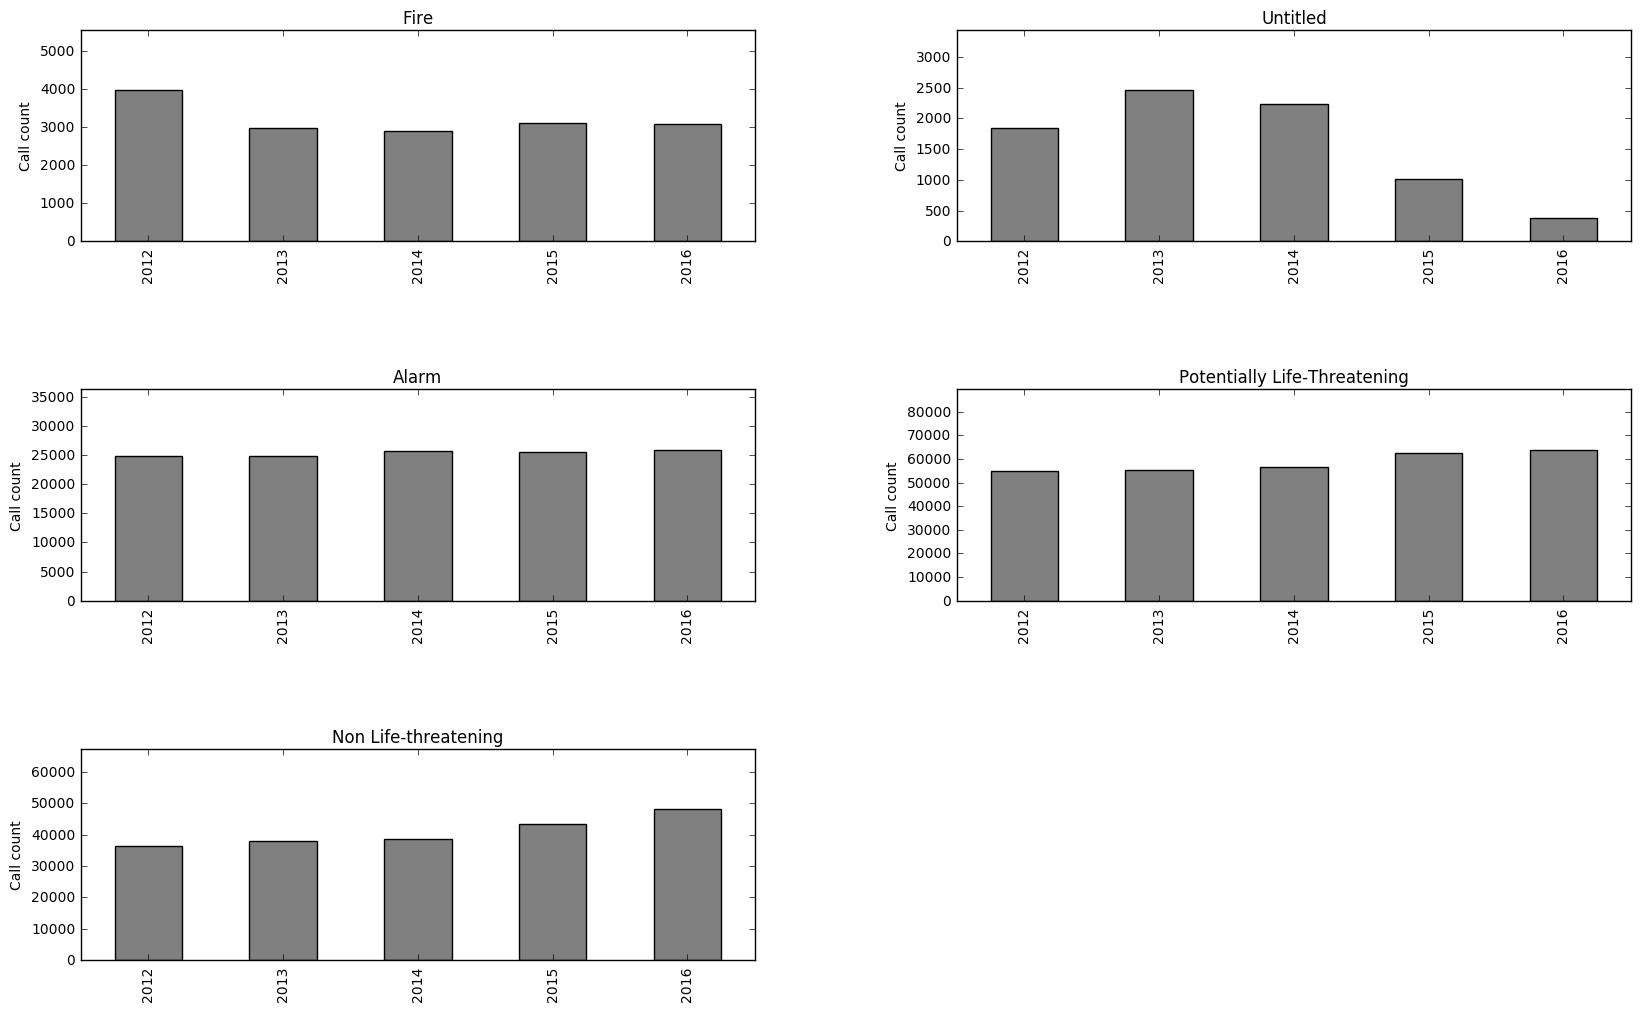

In [12]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,12), dpi=80, facecolor="w", edgecolor="k")

years = ["2012","2013","2014","2015","2016"]

# Create a bar chart for each categories
for index,callTypeGroup in enumerate(callTypeGroups):
    callTypeGroups_year = sorted(Counter(data_callTypeGroups_groupedByYears[callTypeGroup]).items())
    y = defaultdict(int)
    for year in years :
        y[year] = 0
    
    for year,count in callTypeGroups_year:
        if year != "2017":
            y[year] = count
            
    y = [item[1] for item in sorted(y.items())]
    x = years
    
    plt.subplot(3,2,index+1)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
    xs = [i+0.25 for i,_ in enumerate(x)]
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    plt.bar(xs,y,width=0.5,color="gray")
    plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
    plt.xticks(rotation=90)
    y_max = int(max(y)*1.4)
    plt.ylim(ymax = y_max, ymin = 0)
    if callTypeGroup == "":
        plt.title("Untitled")
    else:
        plt.title(callTypeGroup)
    plt.ylabel("Call count")

### Changes in Call final dispositions  frequency between years

Next let´s consider the changes between years of each call final dispositions

In [13]:
# The data collection for this subsection

# Get all call types 
CallFinalDispositions = sorted(set([line["CallFinalDisposition"] for line in data_grouped.values()]))
data_callFinalDispositions_groupedByYears = defaultdict(list)
# Group together all rows with the same Call type, only maintaining the data from the Date key
for row in data_grouped.values():
    data_callFinalDispositions_groupedByYears[row["CallFinalDisposition"]].append(row["CallDate"].split("/")[-1]) 

In [14]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,35), dpi=80, facecolor="w", edgecolor="k")

years = ["2012","2013","2014","2015","2016"]

# Create a bar chart for each categories
for index,callFinalDisposition in enumerate(CallFinalDispositions):
    callFinalDispositions_year = sorted(Counter(data_callFinalDispositions_groupedByYears[callFinalDisposition]).items())
    y = defaultdict(int)
    for year in years :
        y[year] = 0
    
    for year,count in callFinalDispositions_year:
        if year != "2017":
            y[year] = count
            
    y = [item[1] for item in sorted(y.items())]
    x = years
    
    plt.subplot(len(CallFinalDispositions)/2+1,2,index+1)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
    xs = [i+0.25 for i,_ in enumerate(x)]
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    plt.bar(xs,y,width=0.5,color="gray")
    plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
    plt.xticks(rotation=90)
    y_max = int(max(y)*1.4)
    plt.ylim(ymax = y_max, ymin = 0)
    if callFinalDisposition == "":
        plt.title("Untitled")
    else:
        plt.title(callFinalDisposition)
    plt.ylabel("Call count")

### Temporal patterns in call types across the day. 

In [15]:
# The data collection for this subsection

# Get all call types 
callTypes = sorted(set([line["CallType"] for line in data_grouped.values()]))
data_callTypes_groupedByHour = defaultdict(list)

# Group together all rows with the same Call type, only maintaining the data from the Date key
for row in data_grouped.values():
    data_callTypes_groupedByHour[row["CallType"]].append(changeFromAmPm_to_hours(row["ReceivedDtTm"])) 
        

In [16]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,50), dpi=80, facecolor="w", edgecolor="k")

hours = [number for number in range(0,24)]

# Create a bar chart for each categories
for index,callType in enumerate(callTypes):
    callTypes_hour = Counter(data_callTypes_groupedByHour[callType]).items()
    
    y = defaultdict(int)
    for hour in hours :
        y[hour] = 0
    
    for hour,count in callTypes_hour:
        y[int(hour)] = count
        
    y = [item[1] for item in sorted(y.items())]
    x = hours
    
    plt.subplot(len(callTypes)/2+1,2,index+1)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
    xs = [i+0.25 for i,_ in enumerate(x)]
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    plt.bar(xs,y,width=0.5,color="gray")
    plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
    plt.xticks(rotation=90)
    y_max = int(max(y)*1.6)
    plt.ylim(ymax = y_max, ymin = 0)
    if callType == "":
        plt.title("Untitled")
    else:
        plt.title(callType)
    plt.ylabel("Call count")

### Temporal patterns in call types groups across the day. 

In [17]:
# The data collection for this subsection

# Get all call type group
callTypeGroups = sorted(set([line["CallTypeGroup"] for line in data_grouped.values()]))
data_callTypeGroups_groupedByHour = defaultdict(list)

# Group together all rows with the same Call type, only maintaining the data from the Date key
for row in data_grouped.values():
    data_callTypeGroups_groupedByHour[row["CallTypeGroup"]].append(changeFromAmPm_to_hours(row["ReceivedDtTm"])) 

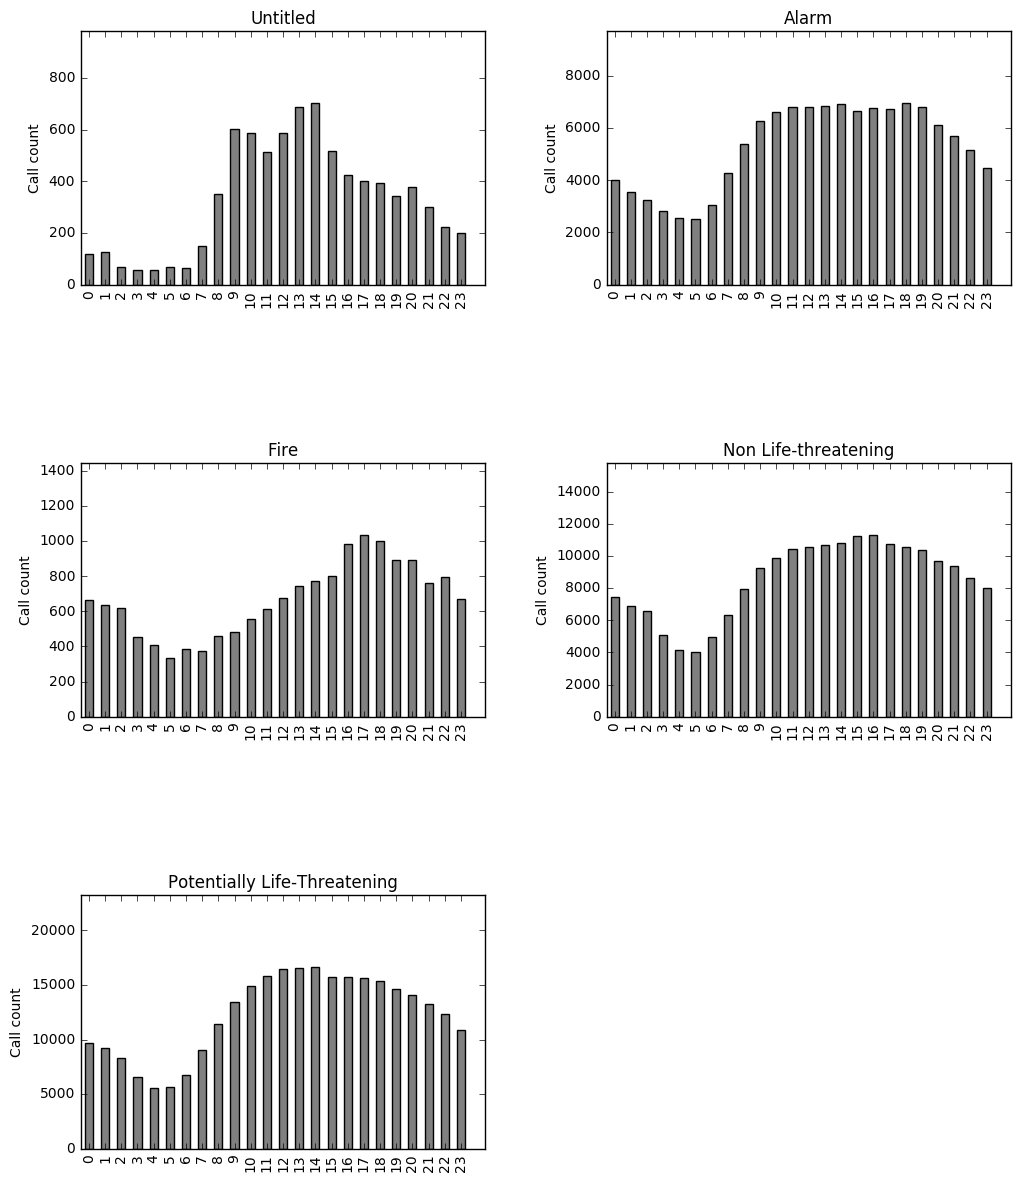

In [18]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(12,20), dpi=80, facecolor="w", edgecolor="k")

hours = [number for number in range(0,24)]

# Create a bar chart for each categories
for index,callTypeGroup in enumerate(callTypeGroups):
    callTypeGroups_hour = Counter(data_callTypeGroups_groupedByHour[callTypeGroup]).items()
    
    y = defaultdict(int)
    for hour in hours :
        y[hour] = 0
    
    for hour,count in callTypeGroups_hour:
        y[int(hour)] = count
        
    y = [item[1] for item in sorted(y.items())]
    x = hours
    
    plt.subplot(4,2,index+1)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
    xs = [i+0.25 for i,_ in enumerate(x)]
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    plt.bar(xs,y,width=0.5,color="gray")
    plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
    plt.xticks(rotation=90)
    y_max = int(max(y)*1.4)
    plt.ylim(ymax = y_max, ymin = 0)
    if callTypeGroup == "":
        plt.title("Untitled")
    else:
        plt.title(callTypeGroup)
    plt.ylabel("Call count")

### Temporal patterns in call final disposition across the day. 

In [19]:
# The data collection for this subsection

# Get all call type group
callFinalDispositions = sorted(set([line["CallFinalDisposition"] for line in data_grouped.values()]))
data_callFinalDisposition_groupedByHour = defaultdict(list)

# Group together all rows with the same Call type, only maintaining the data from the Date key
for row in data_grouped.values():
    data_callFinalDisposition_groupedByHour[row["CallFinalDisposition"]].append(changeFromAmPm_to_hours(row["ReceivedDtTm"])) 

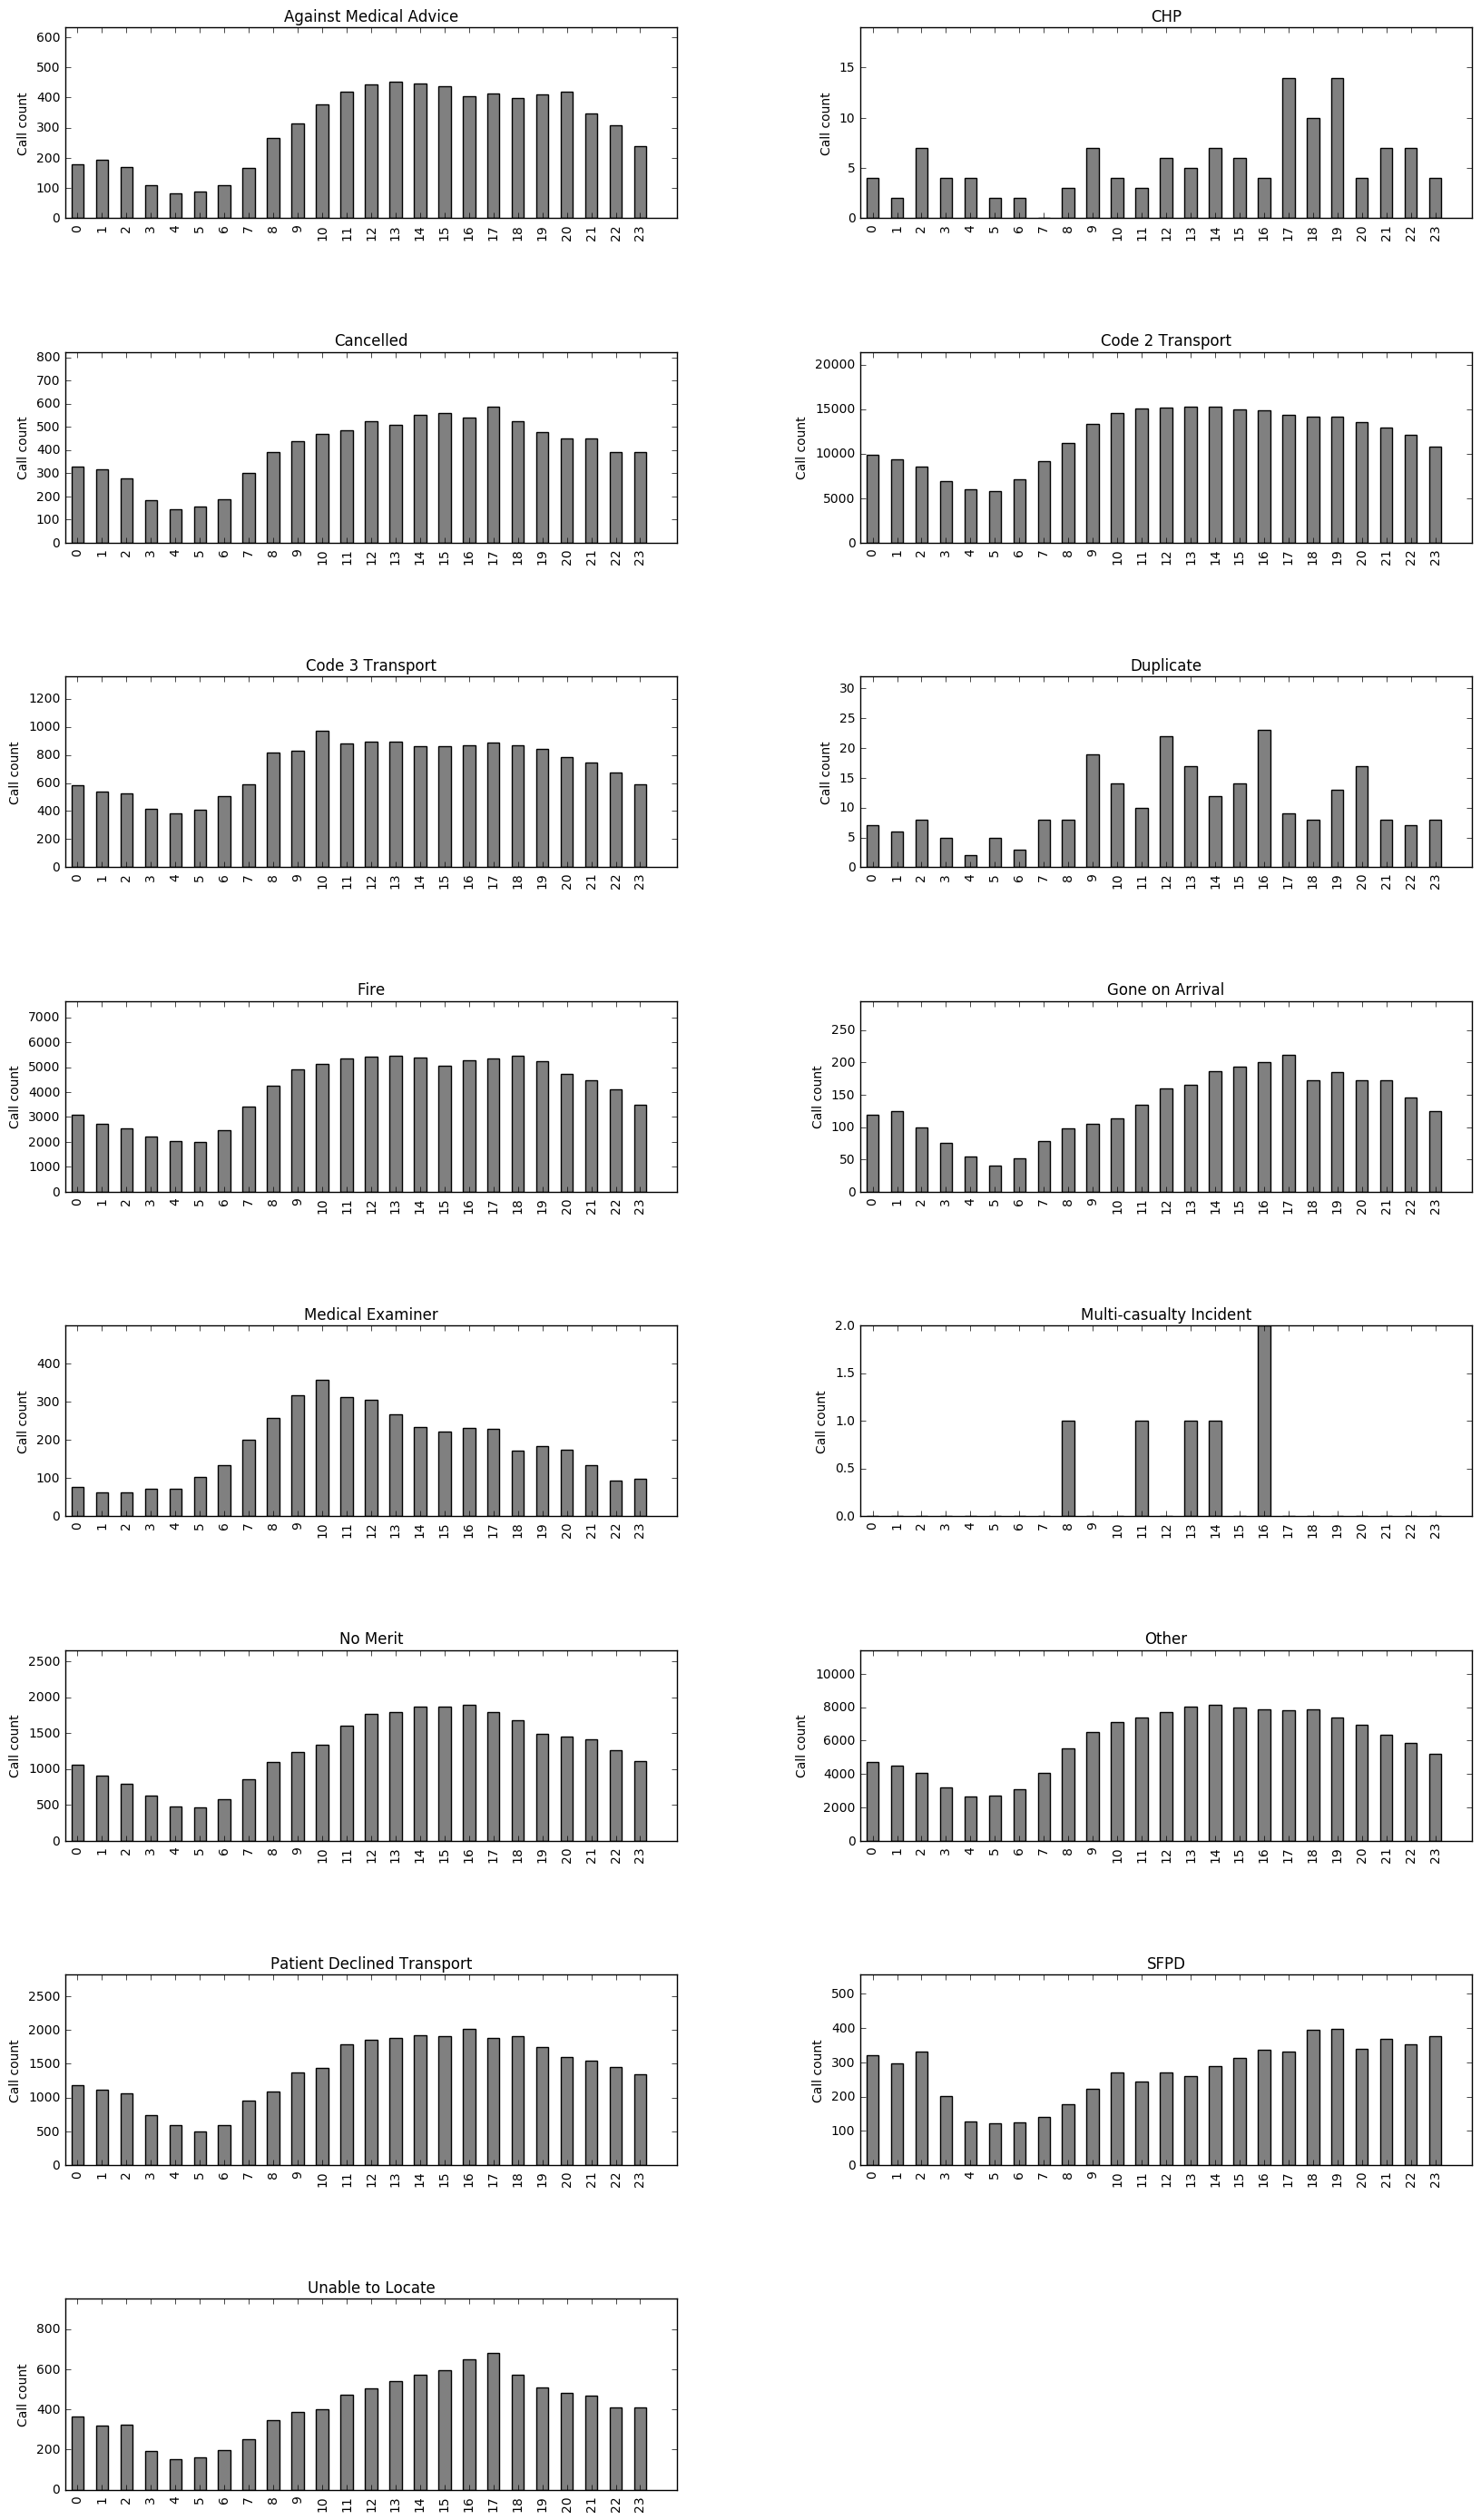

In [20]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,35), dpi=80, facecolor="w", edgecolor="k")

hours = [number for number in range(0,24)]

# Create a bar chart for each categories
for index,callFinalDisposition in enumerate(callFinalDispositions):
    callFinalDispositions_hour = Counter(data_callFinalDisposition_groupedByHour[callFinalDisposition]).items()
    
    y = defaultdict(int)
    for hour in hours :
        y[hour] = 0
    
    for hour,count in callFinalDispositions_hour:
        y[int(hour)] = count
        
    y = [item[1] for item in sorted(y.items())]
    x = hours
    
    plt.subplot(len(callFinalDispositions)/2+1,2,index+1)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
    xs = [i+0.25 for i,_ in enumerate(x)]
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    plt.bar(xs,y,width=0.5,color="gray")
    plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
    plt.xticks(rotation=90)
    y_max = int(max(y)*1.4)
    plt.ylim(ymax = y_max, ymin = 0)
    if callFinalDisposition == "":
        plt.title("Untitled")
    else:
        plt.title(callFinalDisposition)
    plt.ylabel("Call count")

## Neighborhood District analysis

In [21]:
neighborhoodDistricts = set([line["NeighborhoodDistrict"] for line in data])

print "Neighborhood districts in San Fransisco: "
for district in neighborhoodDistricts:
    print district
    

Neighborhood districts in San Fransisco: 
Inner Richmond
Japantown
Glen Park
Western Addition
Outer Richmond
Inner Sunset
Financial District/South Beach
Oceanview/Merced/Ingleside
Presidio Heights
Bernal Heights
Golden Gate Park
South of Market
Portola
Potrero Hill
Treasure Island
Pacific Heights
Hayes Valley
Excelsior
Visitacion Valley
Mission Bay
Marina
Sunset/Parkside
McLaren Park
None
Nob Hill
Lakeshore
West of Twin Peaks
Chinatown
Noe Valley
North Beach
Castro/Upper Market
Haight Ashbury
Lincoln Park
Bayview Hunters Point
Seacliff
Lone Mountain/USF
Presidio
Mission
Tenderloin
Russian Hill
Outer Mission
Twin Peaks


### The frequency of call types in each neighborhood district

In [22]:
# The data collection for this subsection

# Get all neighbourhood districts
neighborhoodDistricts = sorted(neighborhoodDistricts)
data_Districts_groupedByCalltypes = defaultdict(list)

focusCallTypes = [
    "Mutual Aid / Assist Outside Agency",
    "Elevator / Escalator Rescue",
    "Transfer",
    #"Oil Spill",
    "Vehicle Fire",
    "Other",
    "Administrative",
    "Traffic Collision",
    "Train / Rail Fire",
    #"HazMat",
    "Fuel Spill",
    "Outside Fire",
    "Structure Fire",
    "High Angle Rescue",
    "Water Rescue",
    #"Watercraft in Distress",
    "Industrial Accidents",
    #"Train / Rail Incident",
    "Suspicious Package",
    "Extrication / Entrapped (Machinery, Vehicle)",
    "Assist Police",
    "Citizen Assist / Service Call",
    "Smoke Investigation (Outside)",
    "Alarms",
    "Explosion",
    "Aircraft Emergency",
    "Odor (Strange / Unknown)",
    #"Lightning Strike (Investigation)",
    "Marine Fire",
    "Confined Space / Structure Collapse",
    "Electrical Hazard",
    "Medical Incident",
    "Gas Leak (Natural and LP Gases)"]


# Group together all rows with the same Call type, only maintaining the data from the Date key
for row in data_grouped.values():
    if row["CallType"] in focusCallTypes:
        data_Districts_groupedByCalltypes[row["NeighborhoodDistrict"]].append(row["CallType"]) 
    


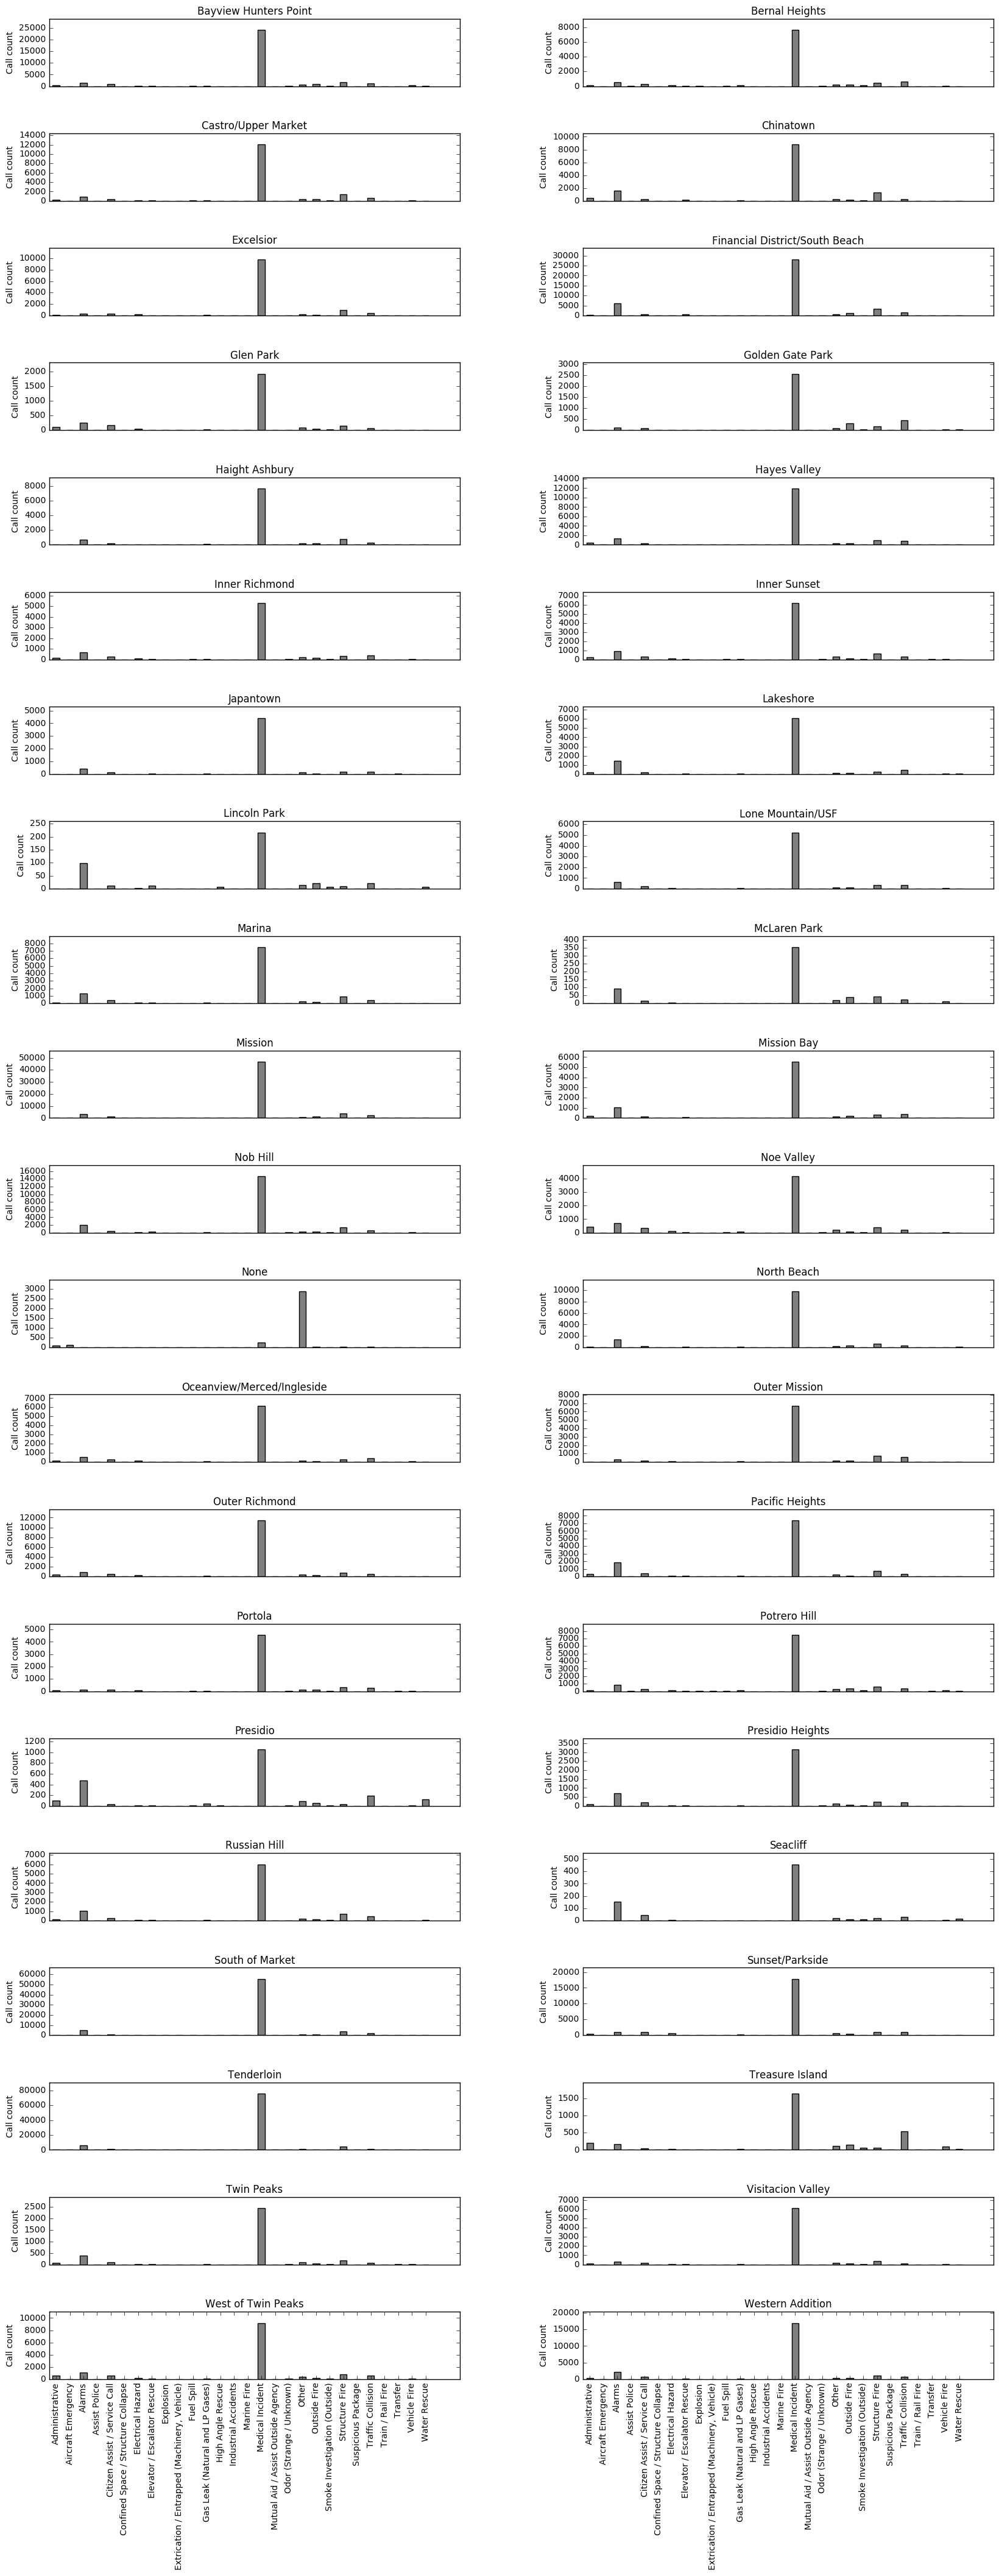

In [23]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,50), dpi=80, facecolor="w", edgecolor="k")

counter = 1

# Create a bar chart for each neighborhood district
for index,district in enumerate(neighborhoodDistricts):
    district_callTypes = Counter(data_Districts_groupedByCalltypes[district]).items()
    
    # initialize y
    y = defaultdict(int)
    for callType in focusCallTypes :
        y[callType] = 0
    
    for calltype,count in district_callTypes:
        y[calltype] = count
        
    y = [item[1] for item in sorted(y.items())]
    x = sorted(focusCallTypes)
    
    plt.subplot(len(neighborhoodDistricts)/2,2,index+1)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered

    xs = [i+0.25 for i,_ in enumerate(x)]
    plt.bar(xs,y,width=0.5,color="gray")
    
    y_max = int(max(y)*1.2)
    plt.ylim(ymax = y_max, ymin = 0)
    
    if counter == len(neighborhoodDistricts) or counter == len(neighborhoodDistricts) - 1:
        plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
        plt.xticks(rotation=90)
    else:
        plt.xticks([])
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    
    
    plt.title(district)
    plt.ylabel("Call count")
    
    counter = counter + 1

### The frequency of call type groups in each neighborhood district

In [24]:
# The data collection for this subsection

# Get all neighbourhood districts
neighborhoodDistricts = sorted(neighborhoodDistricts)
data_Districts_groupedByCalltypeGroups = defaultdict(list)

focusCallTypeGroups = [
    "Fire",
    "Alarm", 
    "Potentially Life-Threatening",
    "Non Life-threatening"
]

# Group together all rows with the same Call type, only maintaining the data from the Date key
for row in data_grouped.values():
    if row["CallTypeGroup"] in focusCallTypeGroups:
        data_Districts_groupedByCalltypeGroups[row["NeighborhoodDistrict"]].append(row["CallTypeGroup"]) 

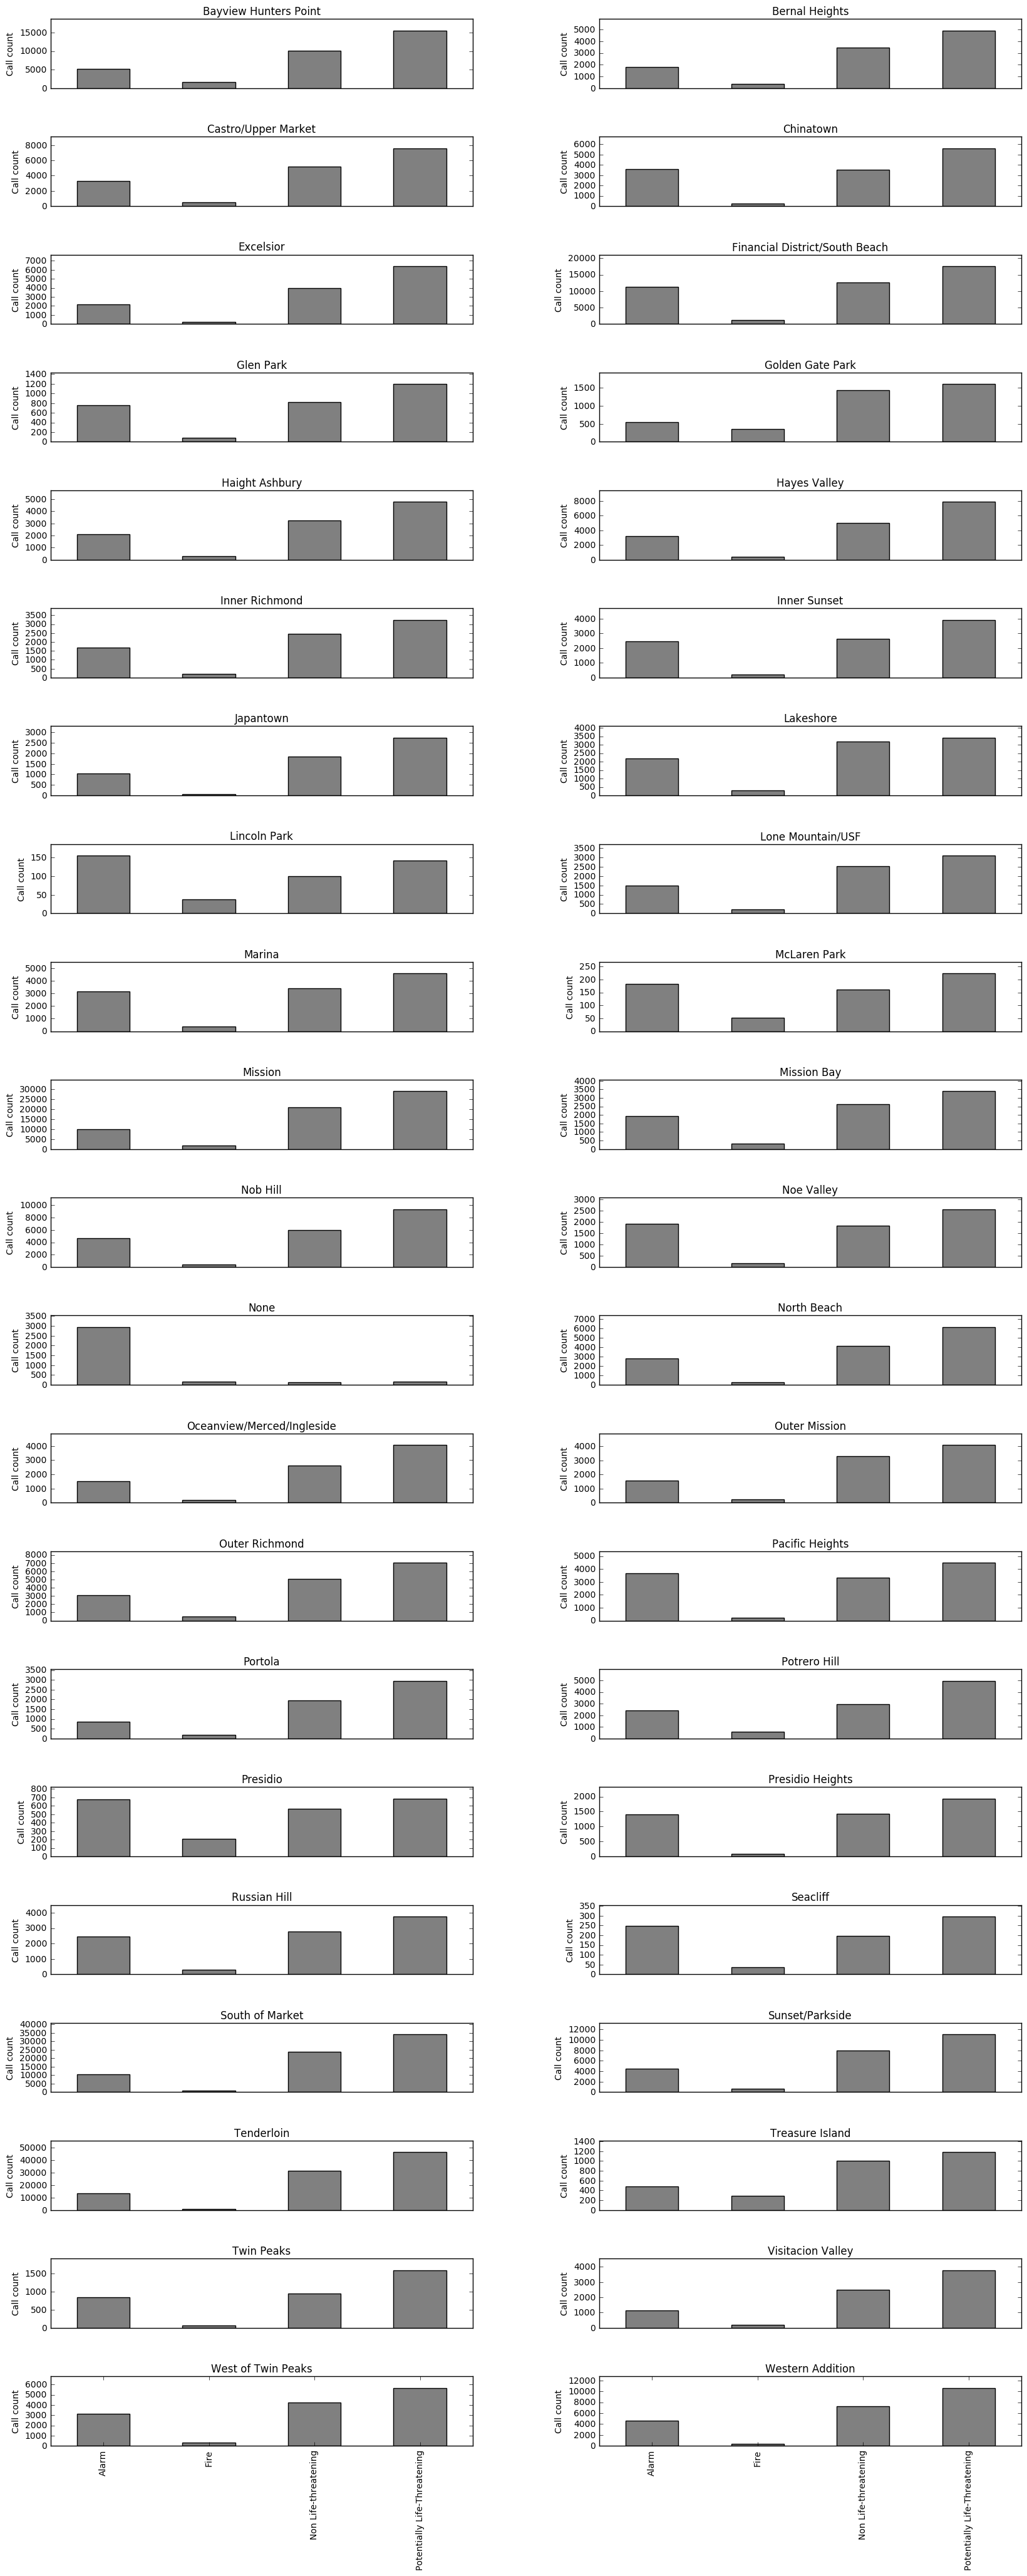

In [25]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,50), dpi=80, facecolor="w", edgecolor="k")

counter = 1

# Create a bar chart for each neighborhood district
for index,district in enumerate(neighborhoodDistricts):
    district_callTypeGroups = Counter(data_Districts_groupedByCalltypeGroups[district]).items()
    
    # initialize y
    y = defaultdict(int)
    for calltypeGroup in focusCallTypeGroups :
        y[calltypeGroup] = 0
    
    for calltypeGroup,count in district_callTypeGroups:
        y[calltypeGroup] = count
        
    y = [item[1] for item in sorted(y.items())]
    x = sorted(focusCallTypeGroups)
    
    plt.subplot(len(neighborhoodDistricts)/2,2,index+1)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered

    xs = [i+0.25 for i,_ in enumerate(x)]
    plt.bar(xs,y,width=0.5,color="gray")
    
    y_max = int(max(y)*1.2)
    plt.ylim(ymax = y_max, ymin = 0)
    
    if counter == len(neighborhoodDistricts) or counter == len(neighborhoodDistricts) - 1:
        plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
        plt.xticks(rotation=90)
    else:
        plt.xticks([])
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    
    
    plt.title(district)
    plt.ylabel("Call count")
    
    counter = counter + 1

### The frequency of call final disposition in each neighborhood district

In [26]:
# The data collection for this subsection

# Get all neighbourhood districts
neighborhoodDistricts = sorted(neighborhoodDistricts)
data_Districts_groupedByCallFinalDisposition = defaultdict(list)

callFinalDispositions = sorted(set([line["CallFinalDisposition"] for line in data_grouped.values()]))

# Group together all rows with the same Call type, only maintaining the data from the Date key
for row in data_grouped.values():
    data_Districts_groupedByCallFinalDisposition[row["NeighborhoodDistrict"]].append(row["CallFinalDisposition"]) 

In [27]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,50), dpi=80, facecolor="w", edgecolor="k")

counter = 1

# Create a bar chart for each neighborhood district
for index,district in enumerate(neighborhoodDistricts):
    district_callFinalDisposition = Counter(data_Districts_groupedByCallFinalDisposition[district]).items()
    
    # initialize y
    y = defaultdict(int)
    for callFinalDisposition in callFinalDispositions:
        y[callFinalDisposition] = 0
    
    for callFinalDisposition,count in district_callFinalDisposition:
        y[callFinalDisposition] = count
        
    y = [item[1] for item in sorted(y.items())]
    x = sorted(callFinalDispositions)
    
    plt.subplot(len(neighborhoodDistricts)/2,2,index+1)
    plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered

    xs = [i+0.25 for i,_ in enumerate(x)]
    plt.bar(xs,y,width=0.5,color="gray")
    
    y_max = int(max(y)*1.2)
    plt.ylim(ymax = y_max, ymin = 0)
    
    if counter == len(neighborhoodDistricts) or counter == len(neighborhoodDistricts) - 1:
        plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
        plt.xticks(rotation=90)
    else:
        plt.xticks([])
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    
    
    plt.title(district)
    plt.ylabel("Call count")
    
    counter = counter + 1

### Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain call types >that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going
    * First, we need to calculate the relative probabilities of seeing each type of call in the dataset as a whole. > That's simply a normalized version of this plot. Let's call it P(callType).
    * Next, we calculate that same probability distribution but for each PD district, let's call that P(calltype|district).
    * Now we look at the ratio P(calltype|district)/P(calltype). That ratio is equal to 1 if the callType occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the callType occurs more frequently within that district. If it's smaller than one, it means that the callType is rarer within the district in question than in the city as a whole.

In [28]:
from __future__ import division

data_groupedByDistrict = defaultdict(list)

for line in data:
    data_groupedByDistrict[line["NeighborhoodDistrict"]].append(line["CallType"])

data_groupedByDistrict_NrOfCalls = { key:len(items) for key,items in data_groupedByDistrict.items()}    

callTypes_count = Counter([line["CallType"] for line in data_grouped.values()])
 

# Get the total number of calls in the data
call_sum = sum([count for key,count in callTypes_count.items()])
# We normalize the data by creating P(callType)
P_callType = {key:count/call_sum for key,count in callTypes_count.items()}

# Get number of calls in each callType for each district
number_of_calls = { district:Counter(items) for district,items in data_groupedByDistrict.items()}

# Normalize each item in number_of_calls by calculating P(callType|district)
P_callTypes_district = {district:{key: item/data_groupedByDistrict_NrOfCalls[district] for key,item in callTypes_.items()} 
                    for district,callTypes_ in number_of_calls.items() }

#The finaly calculate P(crime|district)/P(crime)
P_callType_district_div_p_callType = {district:{ key:item/P_callType[key] for key,item in callTypes_.items() } 
                                for district,callTypes_ in P_callTypes_district.items()}


focus_CallTypes =["Medical Incident",
                  "Traffic Collision","Outside Fire","Structure Fire",
                  "Electrical Hazard","Gas Leak (Natural and LP Gases)"]


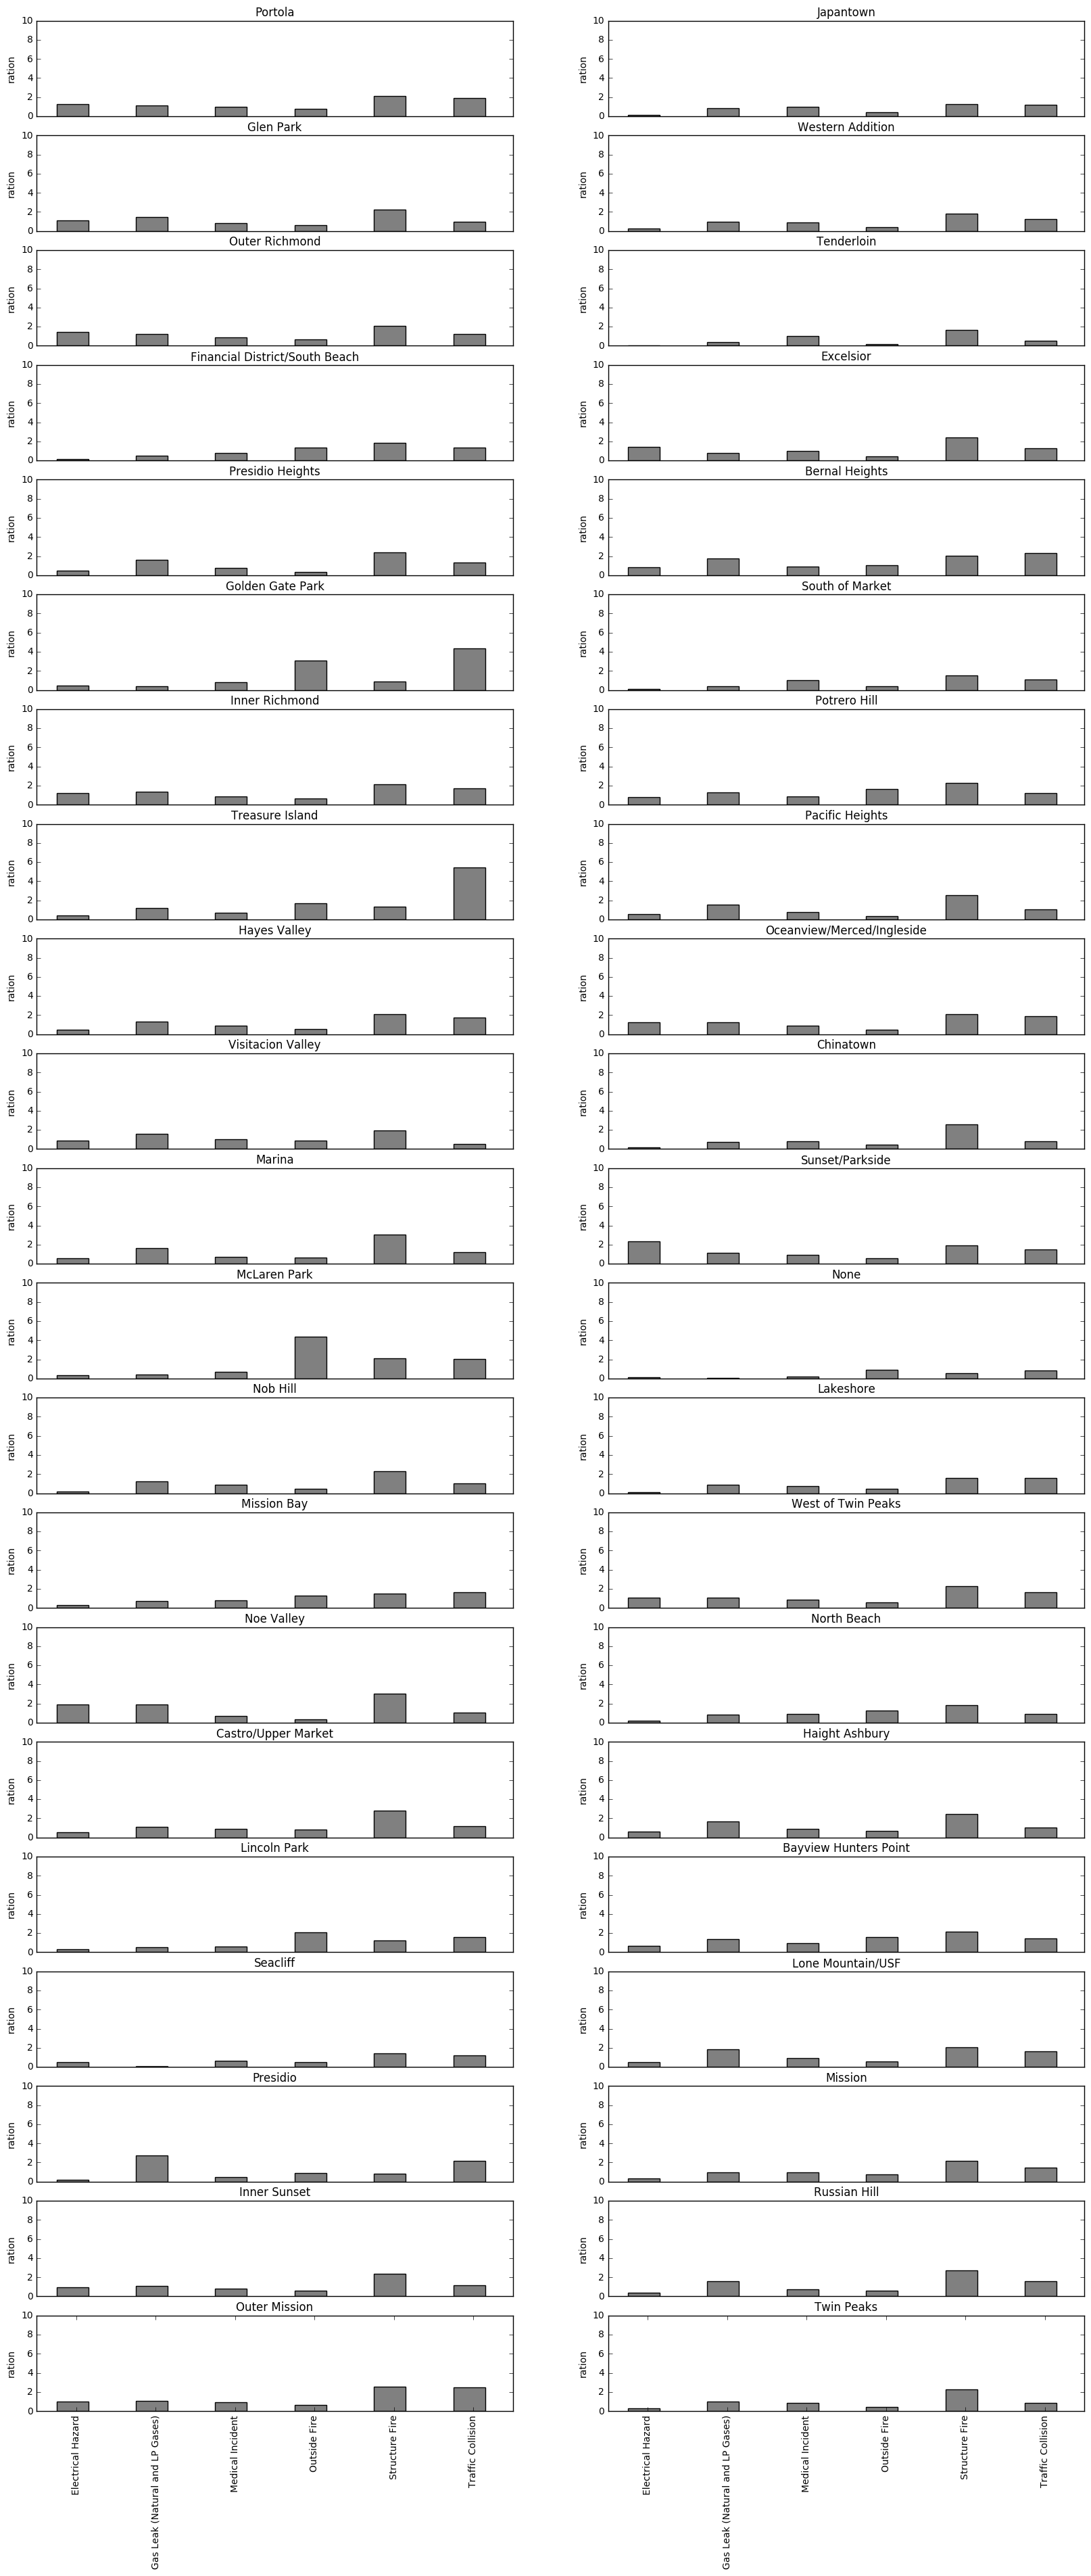

In [29]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,50), dpi=80, facecolor="w", edgecolor="k")

counter = 1
# Go through all district and print out the ratio P(crime|district)/P(crime).
for district,callTypes in P_callType_district_div_p_callType.items():
    # There is a outlier in the data where the p_district is a empty string. We exclude that data point from the graph
    i = counter
    
    callTypes_sorted = sorted(callTypes.items())
    x = [key for key,_ in callTypes_sorted if key in focus_CallTypes] 
    y = [value for key,value in callTypes_sorted if key in focus_CallTypes] 
    
    numberOfDistricts = len(P_callType_district_div_p_callType.keys())
    
    plt.subplot(numberOfDistricts/2+2,2,i)
    #plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
    xs = [i+0.25 for i,_ in enumerate(x)]
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    plt.bar(xs,y, width=0.4, color="gray")
    plt.ylim(ymax = 10.0, ymin = 0.0)
    plt.title(district)
    plt.ylabel("ration")

    if counter == numberOfDistricts-1 or counter == numberOfDistricts:
        plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
        plt.xticks(rotation=90)
    else:
        plt.xticks([])

    counter+=1
            

### Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain CallFinalDisposition >that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going**
    * First, we need to calculate the relative probabilities of seeing each type of CallFinalDisposition in the dataset as a whole. > That's simply a normalized version of this plot. Let's call it P(CallFinalDisposition).
    * Next, we calculate that same probability distribution but for each PD district, let's call that P(CallFinalDisposition|district).
    * Now we look at the ratio P(CallFinalDisposition|district)/P(CallFinalDisposition). That ratio is equal to 1 if the CallFinalDisposition occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the CallFinalDisposition occurs more frequently within that district. If it's smaller than one, it means that the CallFinalDisposition is rarer within the district in question than in the city as a whole.

In [34]:
from __future__ import division

data_groupedByDistrict = defaultdict(list)

for line in data:
    data_groupedByDistrict[line["NeighborhoodDistrict"]].append(line["CallFinalDisposition"])

data_groupedByDistrict_NrOfCalls = { key:len(items) for key,items in data_groupedByDistrict.items()}    

callFinal_count = Counter([line["CallFinalDisposition"] for line in data_grouped.values()])
 

# Get the total number of calls in the data
call_sum = sum([count for key,count in callFinal_count.items()])
# We normalize the data by creating P(callFinal)
P_callFinal = {key:count/call_sum for key,count in callFinal_count.items()}

# Get number of calls in each callFinalDisposition for each district
number_of_calls = { district:Counter(items) for district,items in data_groupedByDistrict.items()}

# Normalize each item in number_of_calls by calculating P(callFinalDisposition|district)
P_callFinals_district = {district:{key: item/data_groupedByDistrict_NrOfCalls[district] for key,item in callTypes_.items()} 
                    for district,callTypes_ in number_of_calls.items() }

#The finaly calculate P(CallFinalDisposition|district)/P(CallFinalDisposition)
P_callFinals_district_div_p_callType = {district:{ key:item/P_callFinal[key] for key,item in callFinals_.items() } 
                                for district,callFinals_ in P_callFinals_district.items()}

focus_callFinalDisposition =["Code 3 Transport","Code 2 Transport","Fire", "Patient Declined Transport"]



In [37]:
# Visualization
%matplotlib inline
plt.figure(num=None, figsize=(20,50), dpi=80, facecolor="w", edgecolor="k")

counter = 1
# Go through all district and print out the ratio P(crime|district)/P(crime).
for district,callFinals in P_callFinals_district_div_p_callType.items():
    # There is a outlier in the data where the p_district is a empty string. We exclude that data point from the graph
    i = counter
    
    callFinals_sorted = sorted(callFinals.items())
    x = [key for key,_ in callFinals_sorted if key in focus_callFinalDisposition] 
    y = [value for key,value in callFinals_sorted if key in focus_callFinalDisposition] 
    
    numberOfDistricts = len(P_callType_district_div_p_callType.keys())
    
    plt.subplot(numberOfDistricts/2+2,2,i)
    #plt.subplots_adjust(wspace=0.3, hspace=0.7)
    # bars are by default width 0.8, so we'll add 0.1 to the left coordinates so that each bar is centered
    xs = [i+0.25 for i,_ in enumerate(x)]
    # plot bar with left x-coordinates [xs], heights [num_occurrence]
    plt.bar(xs,y, width=0.4, color="gray")
    plt.ylim(ymax = 6.0, ymin = 0.0)
    plt.title(district)
    plt.ylabel("ration")

    if counter == numberOfDistricts-1 or counter == numberOfDistricts:
        plt.xticks([i+0.5 for i,_ in enumerate(x)], x)
        plt.xticks(rotation=90)
    else:
        plt.xticks([])

    counter+=1